In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from os import system

In [2]:
data = pd.read_csv('parkinsons.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.shape

(195, 24)

In [4]:
df1=data.pop('status') 
data['status'] = df1

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [6]:
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='PPE'>

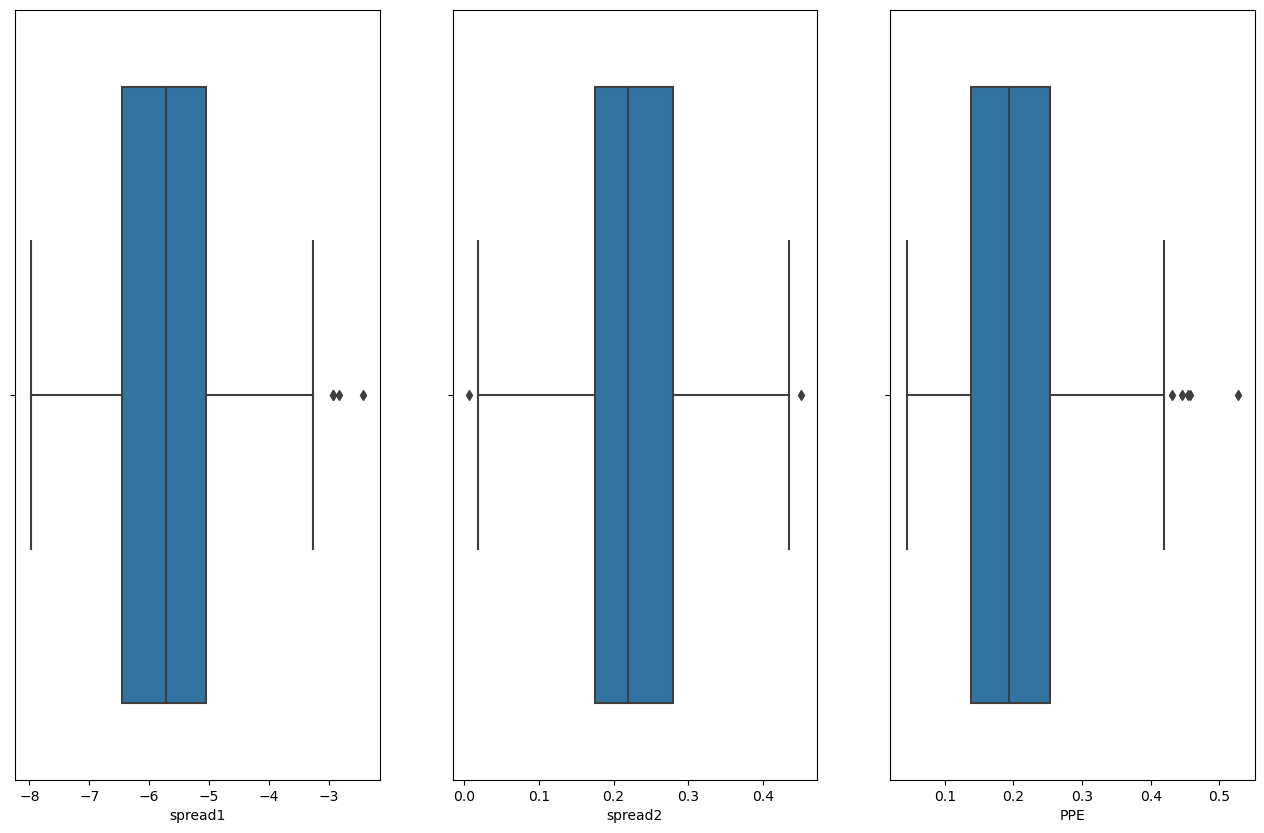

In [8]:
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x='spread1',data=data, ax=ax[0],orient='v') 
sns.boxplot(x='spread2',data=data, ax=ax[1],orient='v')
sns.boxplot(x='PPE',data=data,ax=ax[2],orient='v')

In [9]:
data = data.drop('name',axis=1)

C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\1734759408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[0])
C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\1734759408.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[1])
C:\Users\

<Axes: xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

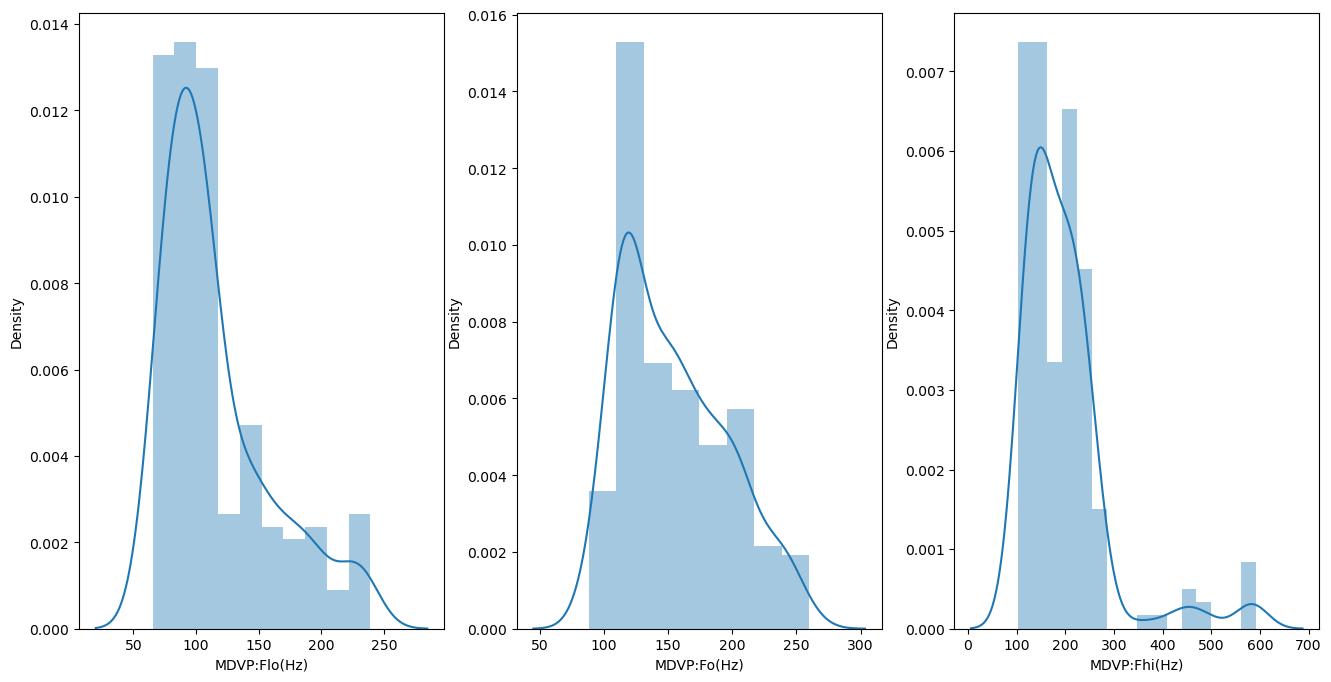

In [10]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2])

C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\1628357414.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NHR'],ax=ax[0])
C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\1628357414.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HNR'],ax=ax[1])


<Axes: xlabel='HNR', ylabel='Density'>

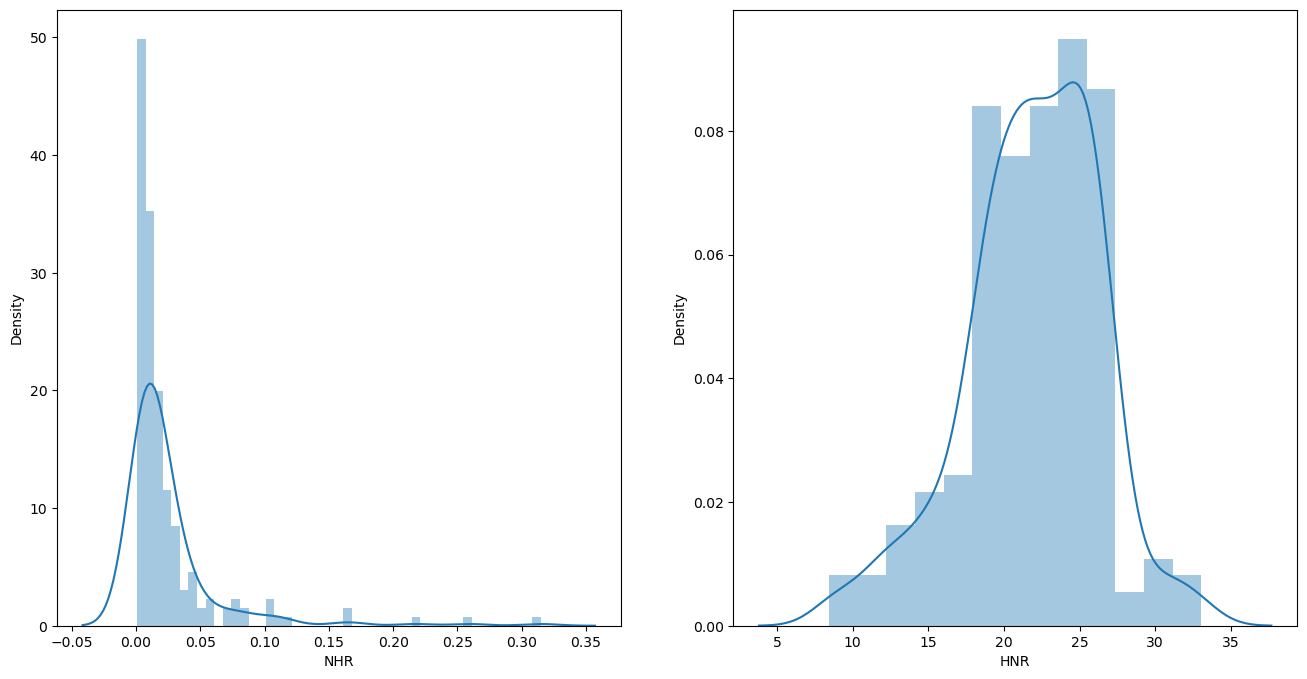

In [11]:
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(data['NHR'],ax=ax[0]) 
sns.distplot(data['HNR'],ax=ax[1])

C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\2547995004.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MDVP:Shimmer'],ax=ax[0,0])
C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\2547995004.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1])


<Axes: xlabel='Shimmer:DDA', ylabel='Density'>

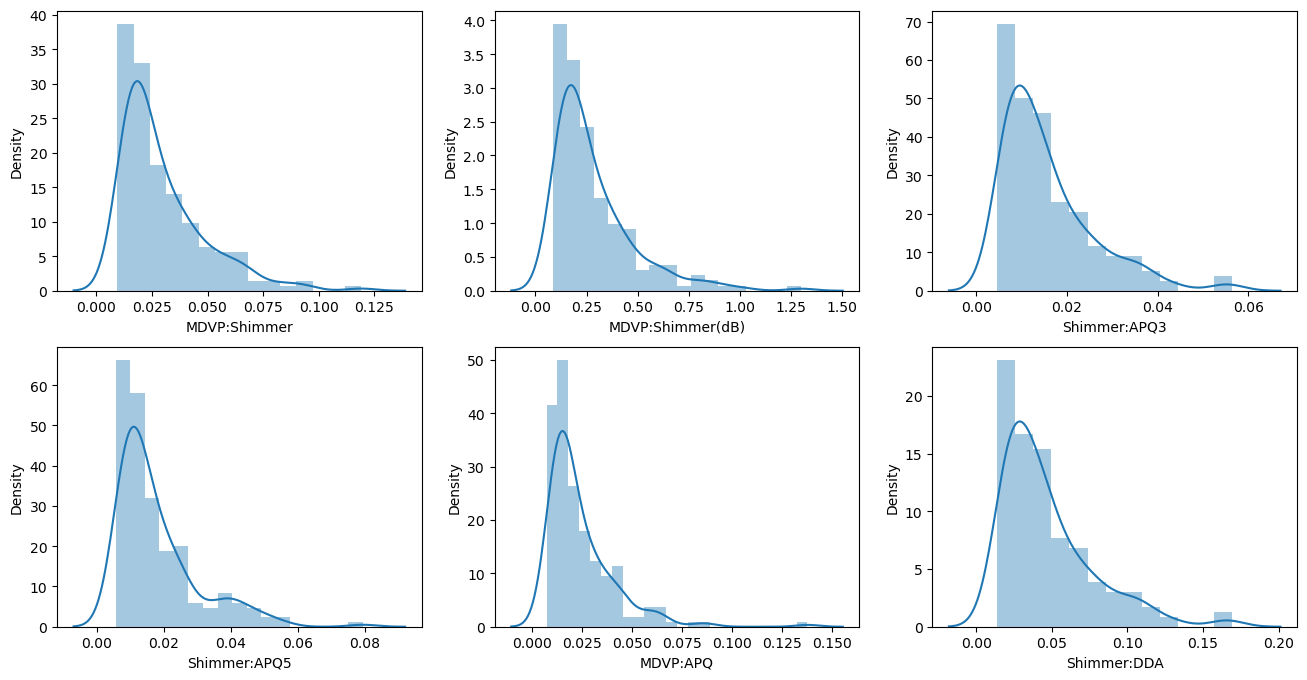

In [12]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(data['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(data['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(data['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(data['Shimmer:DDA'],ax=ax[1,2])

C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\3508488233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[data.status == 0]['spread1'], color = 'r')
C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\3508488233.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[data.status == 

<Axes: xlabel='spread1', ylabel='Density'>

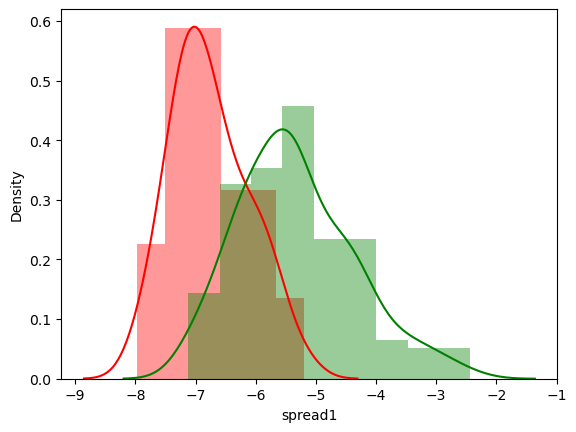

In [13]:
sns.distplot( data[data.status == 0]['spread1'], color = 'r')
sns.distplot( data[data.status == 1]['spread1'], color = 'g')

C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\650564669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[data.status == 0]['spread2'], color = 'r')
C:\Users\dhili\AppData\Local\Temp\ipykernel_21160\650564669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[data.status == 1]

<Axes: xlabel='spread2', ylabel='Density'>

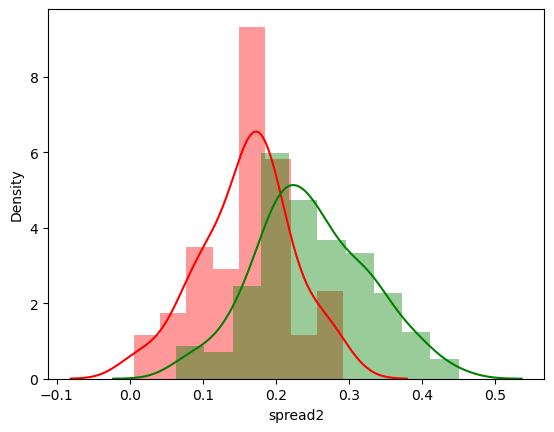

In [14]:
sns.distplot( data[data.status == 0]['spread2'], color = 'r')
sns.distplot( data[data.status == 1]['spread2'], color = 'g')

<Axes: xlabel='status', ylabel='HNR'>

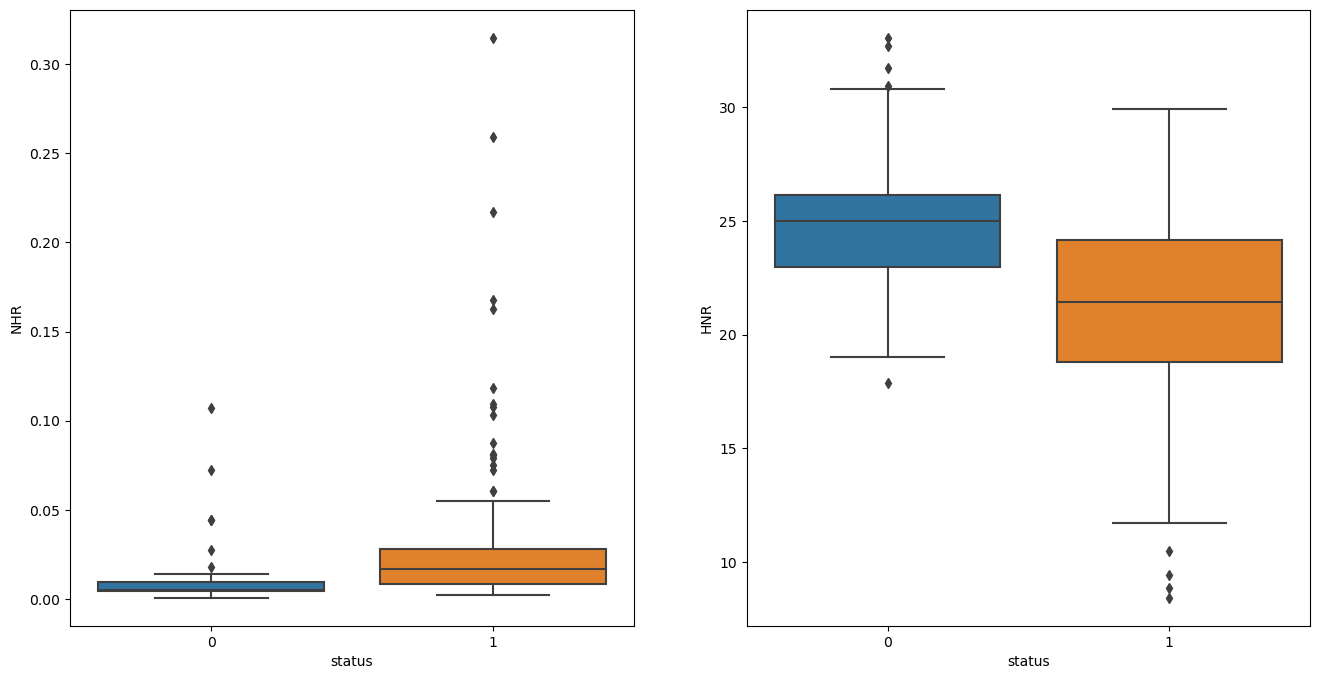

In [15]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=data,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=data,ax=ax[1])

<Axes: xlabel='status', ylabel='DFA'>

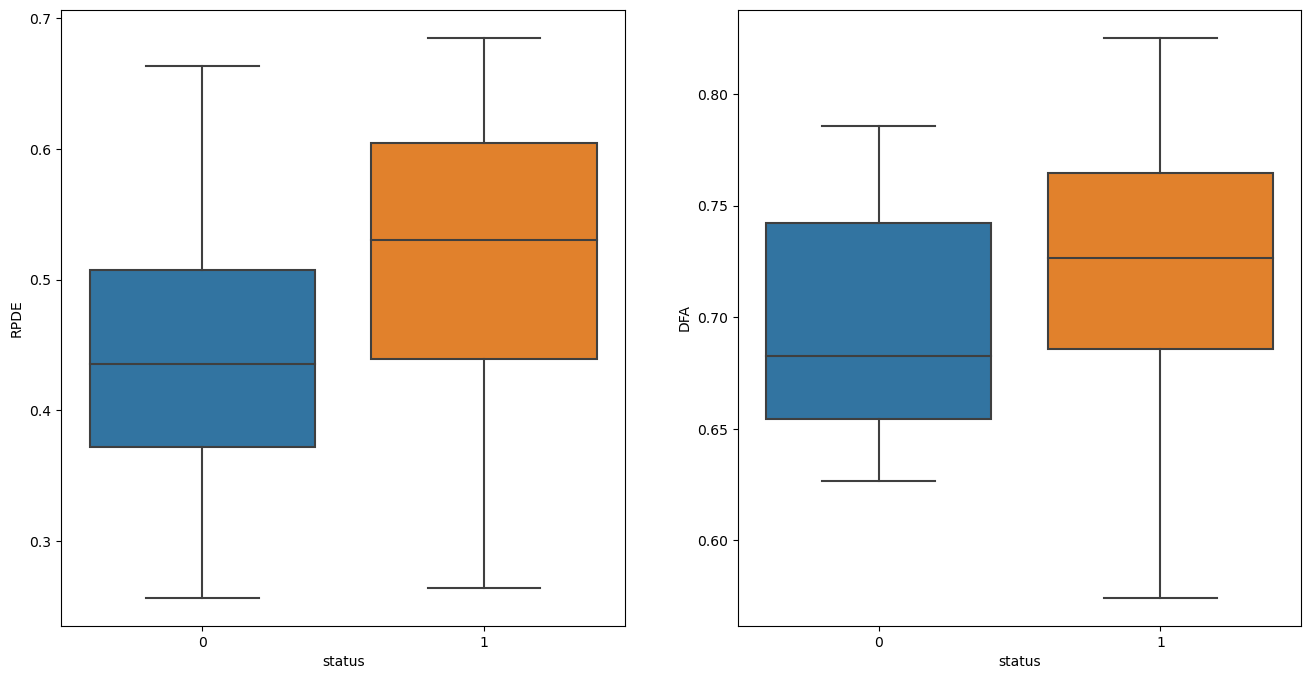

In [16]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='RPDE',data=data,ax=ax[0])
sns.boxplot(x='status',y='DFA',data=data,ax=ax[1])

<Axes: xlabel='status', ylabel='MDVP:Fo(Hz)'>

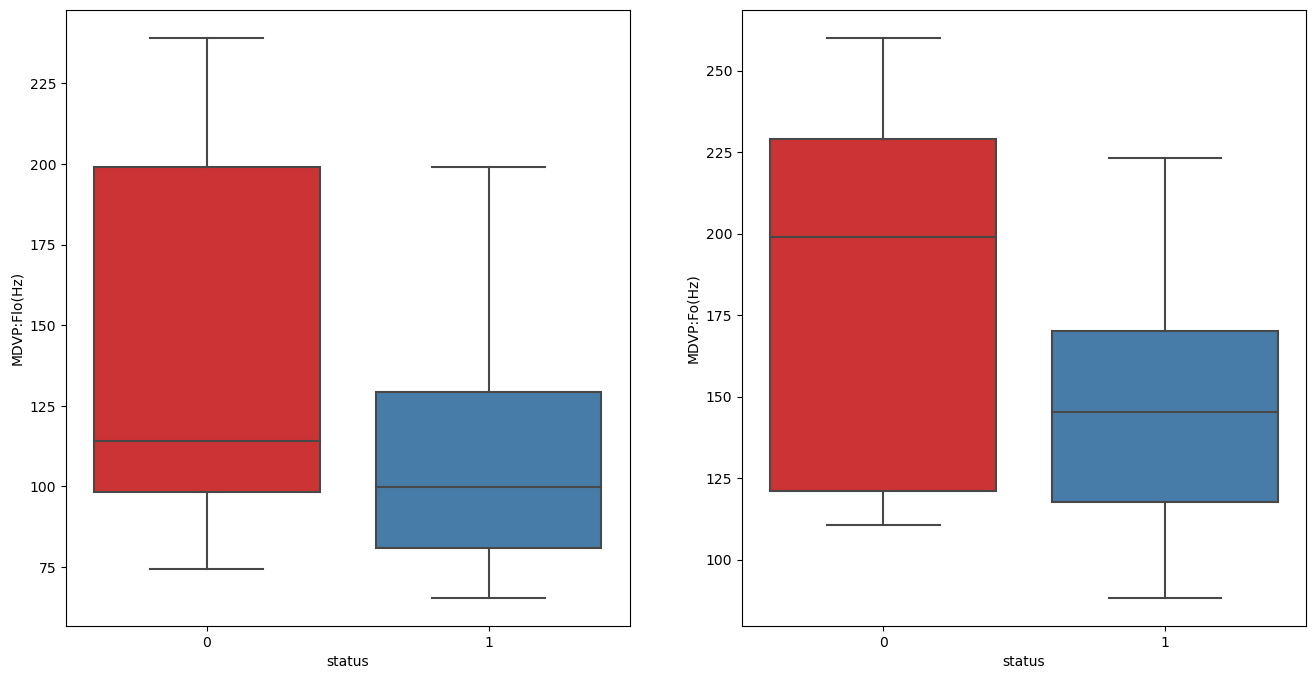

In [17]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=data,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=data,palette="Set1",ax=ax[1])

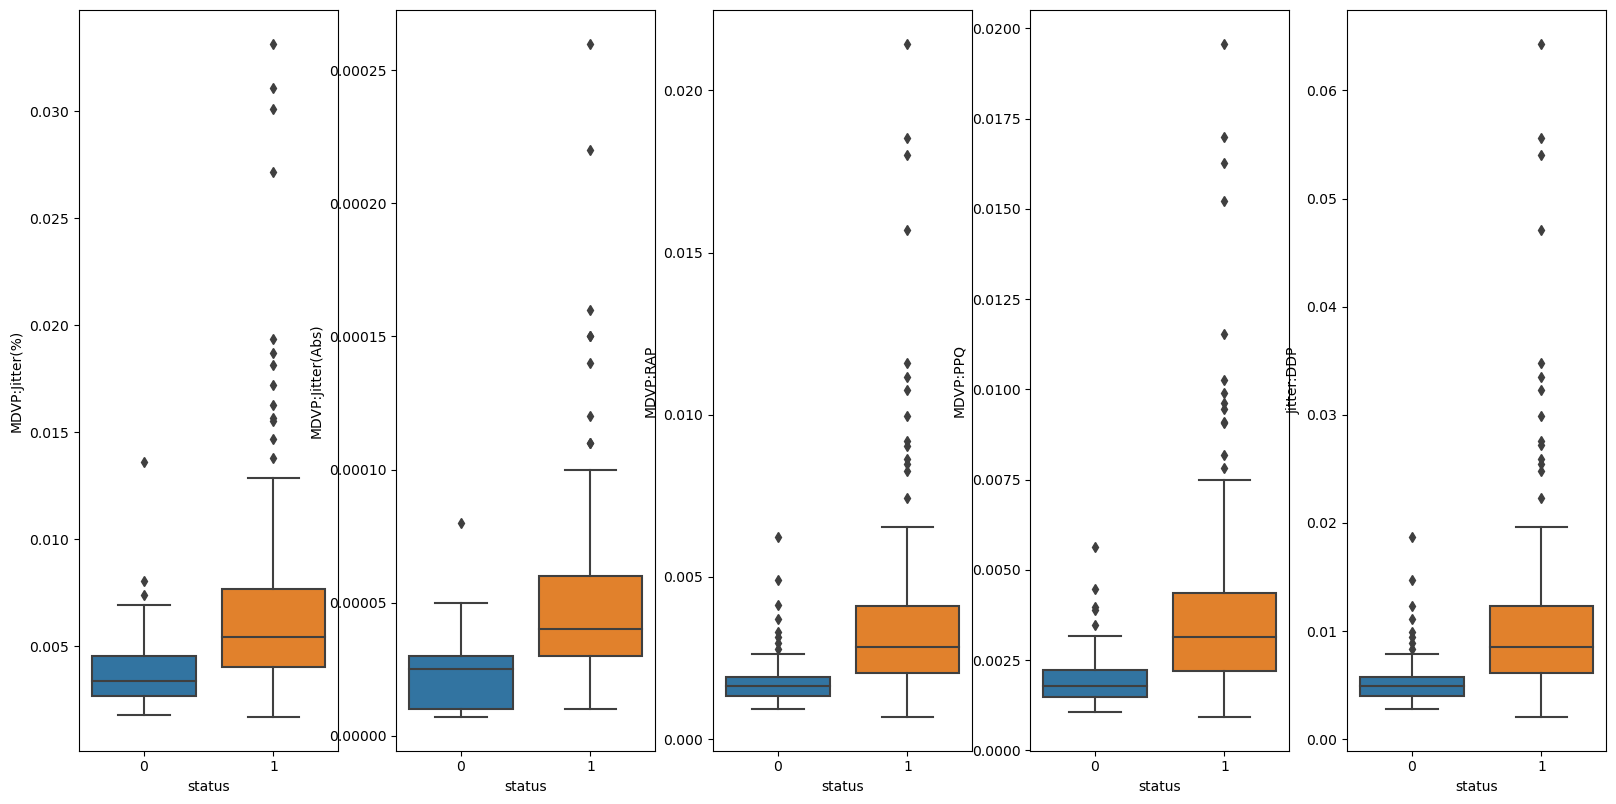

In [18]:
cols = ["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=data, ax = axs[i])

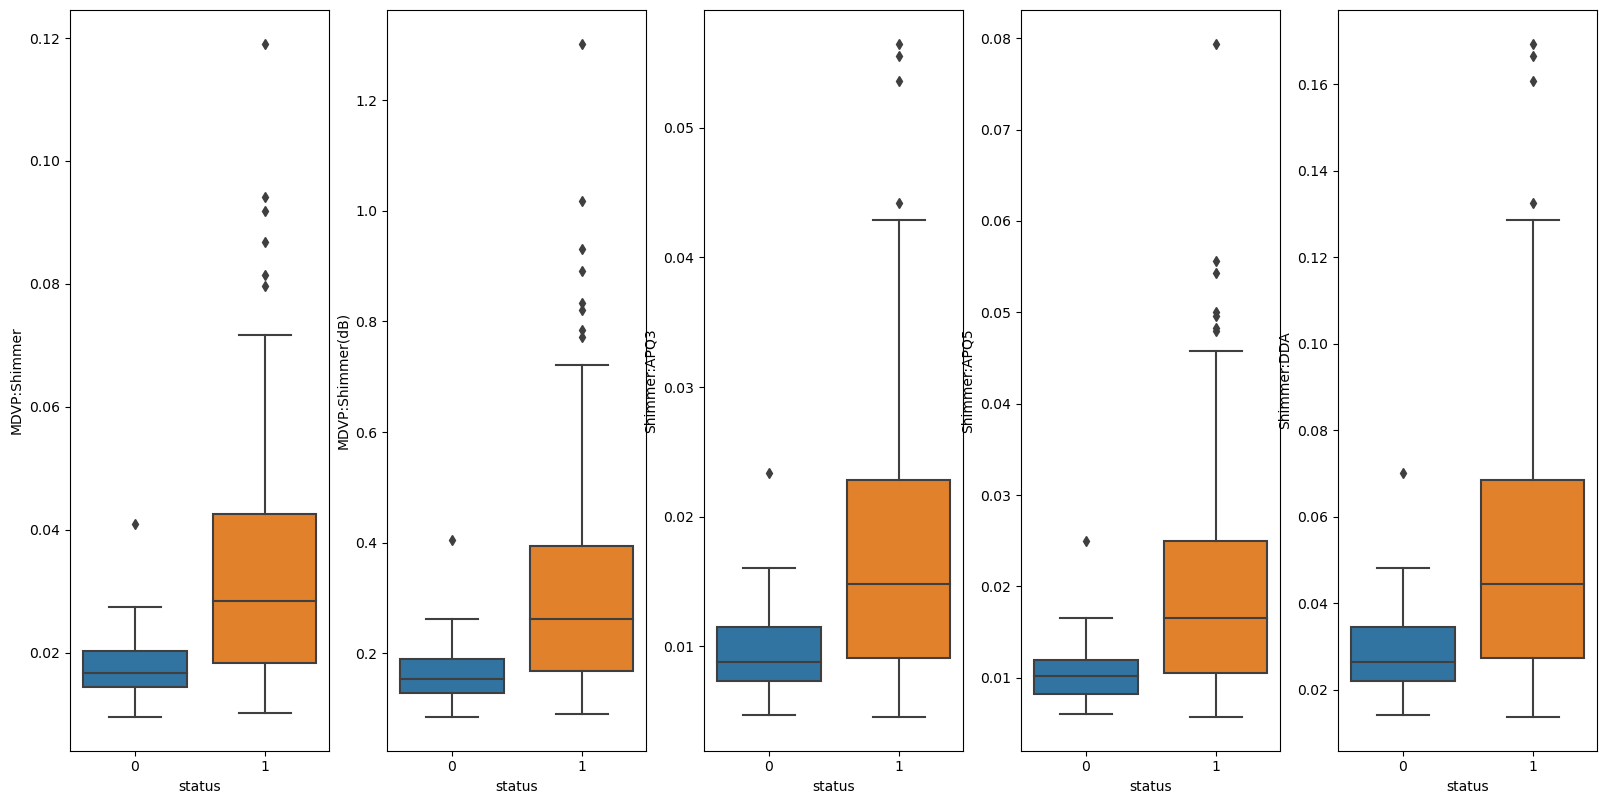

In [19]:
cols = ["MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","Shimmer:DDA"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=data, ax = axs[i])

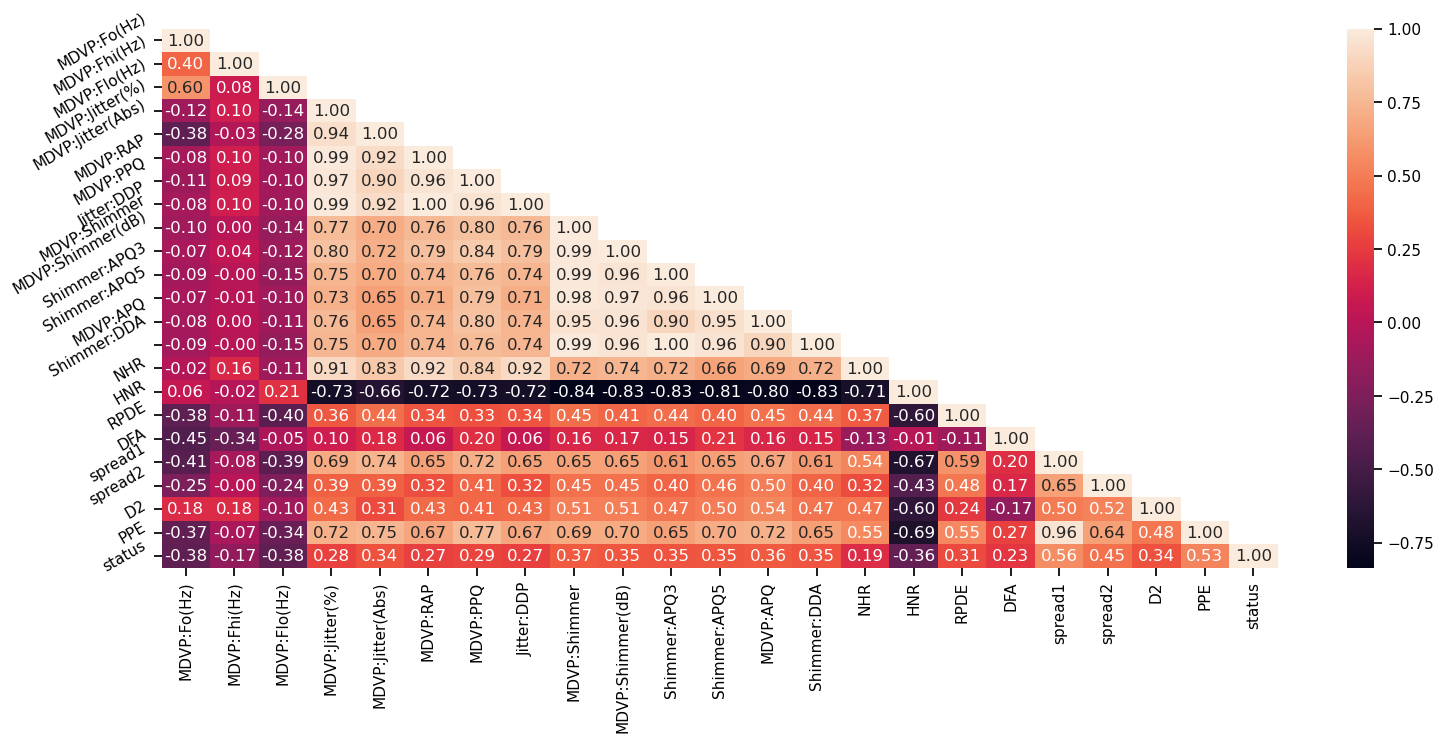

In [20]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [21]:
from sklearn import metrics

In [22]:
X = data.drop("status",axis=1)
y = data["status"]

In [23]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [24]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [26]:
print(len(X_train)),print(len(X_test))

156
39


(None, None)

In [27]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

In [28]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [29]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [30]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.1, random_state=0)

In [31]:
print('The accuracy of the SVM classifier on training data is : {:.2f}'.format(svm.score(X_train, y_train)*100))
print('The accuracy of the SVM classifier on test data is : {:.2f}'.format(svm.score(X_test ,y_test)*100))

The accuracy of the SVM classifier on training data is : 92.31
The accuracy of the SVM classifier on test data is : 92.31


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
print('The accuracy of the Knn classifier on training data is : {:.2f}'.format(knn.score(X_train, y_train)*100))
print('The accuracy of the Knn classifier on test data is : {:.2f}'.format(knn.score(X_test, y_test)*100))

The accuracy of the Knn classifier on training data is : 94.87
The accuracy of the Knn classifier on test data is : 94.87


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
#random_forest.fit(X_train, y_train)
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=15, min_samples_split=5, min_samples_leaf=2, max_features=0.8)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=0.8, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)

In [35]:
print('The accuracy of the Random Forest classifier on training data is : {:.2f}'.format(rf_classifier.score(X_train, y_train)*100))
print('The accuracy of the Random Forest classifier on test data is : {:.2f}'.format(rf_classifier.score(X_test, y_test)*100))

The accuracy of the Random Forest classifier on training data is : 98.72
The accuracy of the Random Forest classifier on test data is : 94.87


In [36]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='lbfgs')
lg.fit(X_train, y_train)

LogisticRegression()

In [37]:
print('The accuracy of the Logistic Regression classifier on training data is : {:.2f}'.format(lg.score(X_train, y_train)*100))
print('The accuracy of the Logistic Regression classifier on test data is : {:.2f}'.format(lg.score(X_test, y_test)*100))

The accuracy of the Logistic Regression classifier on training data is : 87.18
The accuracy of the Logistic Regression classifier on test data is : 89.74


In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)

GaussianNB()

In [39]:
print('The accuracy of the GaussianNB classifier on training data is : {:.2f}'.format(nb.score(X_train, y_train)*100))
print('The accuracy of the GaussianNB classifier on test data is : {:.2f}'.format(nb.score(X_test, y_test)*100))

The accuracy of the GaussianNB classifier on training data is : 69.87
The accuracy of the GaussianNB classifier on test data is : 71.79


In [40]:
# # Example feature values
# example_values = {
#     'MDVP:Fo(Hz)': 119.992,
#     'MDVP:Fhi(Hz)': 157.302,
#     'MDVP:Flo(Hz)': 74.997,
#     'MDVP:Jitter(%)': 0.00784,
#     'MDVP:Jitter(Abs)': 0.00007,
#     'MDVP:RAP': 0.00370,
#     'MDVP:PPQ': 0.00554,
#     'Jitter:DDP': 0.01109,
#     'MDVP:Shimmer': 0.04374,
#     'MDVP:Shimmer(dB)': 0.426,
#     'Shimmer:APQ3': 0.02182,
#     'Shimmer:APQ5': 0.03130,
#     'MDVP:APQ': 0.02971,
#     'Shimmer:DDA': 0.06545,
#     'NHR': 0.02211,
#     'HNR': 21.033,
#     'RPDE': 0.414783,
#     'DFA': 0.815285,
#     'spread1': -4.813031,
#     'spread2': 0.266482,
#     'D2': 2.301442,
#     'PPE': 0.284654
# }

# # Convert example values to a DataFrame
# example_df = pd.DataFrame(example_values, index=[0])

# # Scale the features
# example_scaled = st_x.transform(example_df)

# # Make predictions using the trained models
# svm_prediction = svm.predict(example_scaled)[0]
# knn_prediction = knn.predict(example_scaled)[0]
# rf_prediction = rf_classifier.predict(example_scaled)[0]
# lg_prediction = lg.predict(example_scaled)[0]
# nb_prediction = nb.predict(example_scaled)[0]

# print("Example Values:")
# print(example_df)
# print("\nPredictions:")
# print("SVM Prediction:", svm_prediction)
# print("KNN Prediction:", knn_prediction)
# print("Random Forest Prediction:", rf_prediction)
# print("Logistic Regression Prediction:", lg_prediction)
# print("GaussianNB Prediction:", nb_prediction)


In [41]:
from flask import Flask, render_template, request
import pandas as pd
from sklearn.preprocessing import StandardScaler


app = Flask(__name__)

# Load the dataset
# Fit the models
X = data.drop("status", axis=1)
y = data["status"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#svm_model.fit(X_scaled, y)
#knn_model.fit(X_scaled, y)
rf_classifier.fit(X_scaled, y)
#lg_model.fit(X_scaled, y)
#nb_model.fit(X_scaled, y)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        # Extract specific values from the form submission
        mdvp_fo_hz = float(request.form['MDVP:Fo(Hz)'])
        mdvp_fhi_hz = float(request.form['MDVP:Fhi(Hz)'])
        mdvp_flo_hz = float(request.form['MDVP:Flo(Hz)'])
        mdvp_jitter_percent = float(request.form['MDVP:Jitter(%)'])
        mdvp_jitter_abs = float(request.form['MDVP:Jitter(Abs)'])
        mdvp_rap = float(request.form['MDVP:RAP'])
        mdvp_ppq = float(request.form['MDVP:PPQ'])
        jitter_ddp = float(request.form['Jitter:DDP'])
        mdvp_shimmer = float(request.form['MDVP:Shimmer'])
        mdvp_shimmer_db = float(request.form['MDVP:Shimmer(dB)'])
        shimmer_apq3 = float(request.form['Shimmer:APQ3'])
        shimmer_apq5 = float(request.form['Shimmer:APQ5'])
        mdvp_apq = float(request.form['MDVP:APQ'])
        shimmer_dda = float(request.form['Shimmer:DDA'])
        nhr = float(request.form['NHR'])
        hnr = float(request.form['HNR'])
        rpde = float(request.form['RPDE'])
        dfa = float(request.form['DFA'])
        spread1 = float(request.form['spread1'])
        spread2 = float(request.form['spread2'])
        d2 = float(request.form['D2'])
        ppe = float(request.form['PPE'])

        # Create a dictionary with the extracted values
        example_values = {
            'MDVP:Fo(Hz)': mdvp_fo_hz,
            'MDVP:Fhi(Hz)': mdvp_fhi_hz,
            'MDVP:Flo(Hz)': mdvp_flo_hz,
            'MDVP:Jitter(%)': mdvp_jitter_percent,
            'MDVP:Jitter(Abs)': mdvp_jitter_abs,
            'MDVP:RAP': mdvp_rap,
            'MDVP:PPQ': mdvp_ppq,
            'Jitter:DDP': jitter_ddp,
            'MDVP:Shimmer': mdvp_shimmer,
            'MDVP:Shimmer(dB)': mdvp_shimmer_db,
            'Shimmer:APQ3': shimmer_apq3,
            'Shimmer:APQ5': shimmer_apq5,
            'MDVP:APQ': mdvp_apq,
            'Shimmer:DDA': shimmer_dda,
            'NHR': nhr,
            'HNR': hnr,
            'RPDE': rpde,
            'DFA': dfa,
            'spread1': spread1,
            'spread2': spread2,
            'D2': d2,
            'PPE': ppe
        }

        # Convert the dictionary to a DataFrame
        example_df = pd.DataFrame(example_values, index=[0])

        #scaler = StandardScaler()

        # Transform the data using the scaler
        example_scaled = scaler.transform(example_df)
        
        # Make predictions using each model
#         svm_prediction = svm_model.predict(example_scaled)[0]
#         knn_prediction = knn_model.predict(example_scaled)[0]
        rf_prediction = rf_classifier.predict(example_scaled)[0]
#         lg_prediction = lg_model.predict(example_scaled)[0]
#         nb_prediction = nb_model.predict(example_scaled)[0]
        rf_prediction=1 and "Yes the paitent has Affected by Parkinsion" or "The paitent is Normal"
        # Pass predictions to the result.html template
        return render_template('result.html', 
#                                svm_prediction=svm_prediction,
#                                knn_prediction=knn_prediction,
                               rf_prediction=rf_prediction)
#                                lg_prediction=lg_prediction,
#                                nb_prediction=nb_prediction)

In [ ]:
if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Mar/2024 16:33:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Mar/2024 16:33:09] "POST /predict HTTP/1.1" 200 -
